In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


f = open("./data/fulldata.csv")
movies = pd.read_csv(f)
#giving all of the non oscar winners none, and dropping some uneccesary columns
movies.loc[:,"Award"].fillna("None", inplace=True)
movies = movies.drop("IMDB Votes", axis = 1)
movies = movies.drop("Film Studio/Producer(s)", axis = 1)
movies.head()
#len(movies)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Award
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,None
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,None
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,None
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,None
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,None


In [3]:
#removing small companies so I can create dummies only for 10 largest movie companies 
threshold = 93 # Anything that occurs less than this will be removed, so any companies with less an 93 movies
value_counts = movies.stack().value_counts() 
value_counts = movies["company"].value_counts() 
to_remove = value_counts[value_counts <= threshold].index
movies["company"].replace(to_remove, "not top 10", inplace=True)
movies.head() #company is relaced by one of the top 10 companies or "not top 10"

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Award
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,None
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,None
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,not top 10,124.0,None
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,None
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,not top 10,98.0,None


In [4]:
#removing small directors so I can create dummies only for 11 largest movie directors, two are tied at 19 movies
threshold = 19 # Anything that occurs less than this will be removed.
value_counts = movies.stack().value_counts() # Entire DataFrame 
value_counts = movies["director"].value_counts() # Specific column 
#to_remove = value_counts[value_counts <= threshold].index
#movies["director"].replace(to_remove, "not top 11", inplace=True)
#movies.head()
#actually no even the top 11 is only a tiny percentage of the movies, company made sense this doesn't so ignore this code block

In [5]:
#adjusting for inflation
#will put everything in January 1980 dollars
#while there is mild variation thru the year this is the most accurate I can do while also preserving my time
inflation = [1, 1.12, 1.21, 1.26, 1.31, 1.36, 1.41, 1.43, 1.49, 1.56, 1.64, 1.73, 1.78, 1.83, 1.88, 1.93, 1.98, 2.04, 2.08, 2.11, 2.17, 2.25, 
             2.28, 2.34, 2.38, 2.45, 2.55, 2.60, 2.71, 2.71, 2.79,2.83, 2.91, 2.96, 3.01, 3.00, 3.05, 3.12, 3.19, 3.24, 3.32]
#print(len(inflation)) should be 41 and is 41
movies["adjusted_gross"] = np.zeros(7668)
movies["adjusted_budget"] = np.zeros(7668)
#I'm using the data.bls.gov CPI inflation calculator to put everything in 1980 dollars
for i in range(7668):
    inf = movies.iloc[i].get("year")%1980
    adjusted_g = movies.iloc[i].get("gross")/inflation[inf]
    adjusted_b = movies.iloc[i].get("budget")/inflation[inf]
    movies.at[i, 'adjusted_gross'] = adjusted_g
    movies.at[i, 'adjusted_budget'] = adjusted_b
movies.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Award,adjusted_gross,adjusted_budget
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,None,46998772.0,19000000.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,None,58853106.0,4500000.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,not top 10,124.0,None,538375067.0,18000000.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,None,83453539.0,3500000.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,not top 10,98.0,None,39846344.0,6000000.0


In [31]:
#creating a season dummy variable from the release date
movies["season"] = np.zeros(7668)
for i in range(7668):
    str_year = str(movies.iloc[i].get("released"))
    arr = str_year.split(" ")
    if (arr[0] == "December" or arr[0] == "January" or arr[0] == "February"):
        season = "Winter"
    elif (arr[0] == "March" or arr[0] == "April" or arr[0] == "May"):
        season = "Spring"
    elif (arr[0] == "June" or arr[0] == "July" or arr[0] == "August"):
        season = "Summer" 
    elif (arr[0] == "September" or arr[0] == "October" or arr[0] == "November"):
        season = "Fall"
    else:
        season = "no release date"
    movies.at[i, 'season'] = season
movies.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Award,adjusted_gross,adjusted_budget,season
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,None,46998772.0,19000000.0,Summer
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,None,58853106.0,4500000.0,Summer
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,not top 10,124.0,None,538375067.0,18000000.0,Summer
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,None,83453539.0,3500000.0,Summer
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,not top 10,98.0,None,39846344.0,6000000.0,Summer


<Axes: xlabel='year', ylabel='adjusted_gross'>

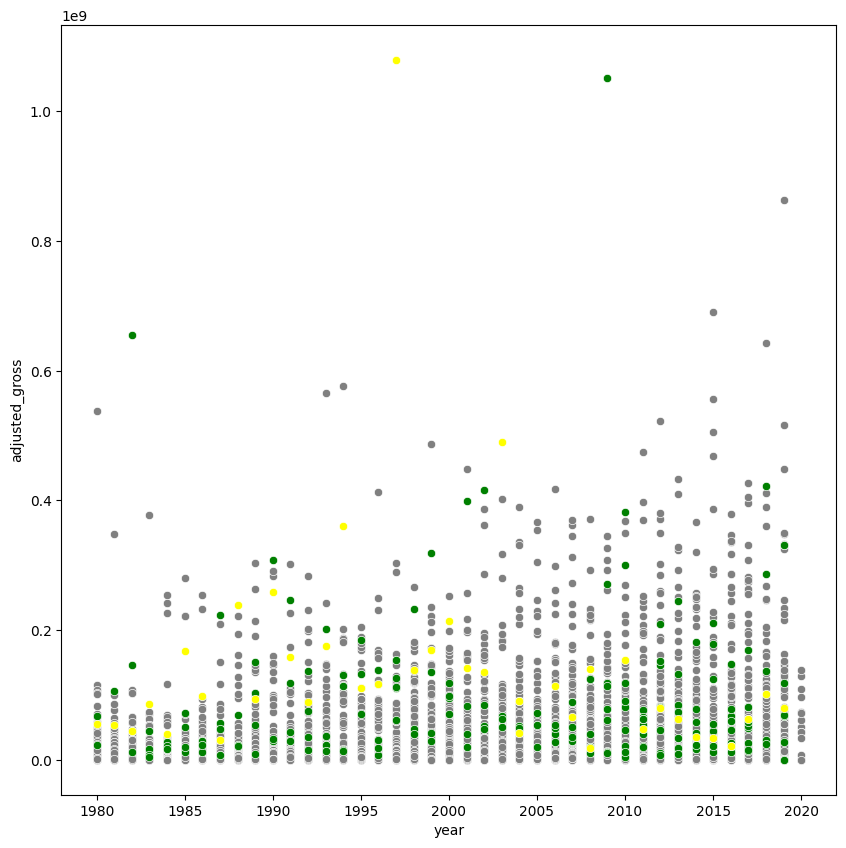

In [35]:
winners = movies.loc[(movies["Award"] == 'Winner')]
nominees = movies.loc[(movies["Award"] == 'Nominee')]
none = movies.loc[(movies["Award"] == 'None')]
plt.figure(figsize=(10,10))
sns.scatterplot(x=none["year"], y=none["adjusted_gross"], color= 'GRAY')
sns.scatterplot(x=nominees["year"], y=nominees["adjusted_gross"], color= 'GREEN')
sns.scatterplot(x=winners["year"], y=winners["adjusted_gross"], color= 'YELLOW')

In [37]:
#exporting the datasets
movies.to_csv(r"./final_data/clean_data.csv", index=False)
winners.to_csv(r"./final_data/winners.csv", index=False)
nominees.to_csv(r"./final_data/nominees.csv", index=False)
none.to_csv(r"./final_data/no_award.csv", index=False)
